# Análise exploratória de dados

In [14]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

## 1. Coleta dos dados

In [15]:
df = sns.load_dataset('fmri')
df.to_csv('../data/raw/data.csv', index=False)
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


## 2. Descrição dos dados

"fMRI" é uma abreviação para ressonância magnética funcional, uma técnica de imagem por ressonância magnética (IRM) que mede a atividade cerebral através da detecção de mudanças no fluxo sanguíneo. Os dados fornecem informações sobre a atividade cerebral de pacientes submetidos a estímulos visuais durante a ressonância magnética funcional. O conjunto de dados consiste em 1064 instâncias, as variáveis incluem:
    
   - subject: Identificação única do participante do estudo. Esta variável é qualitativa/nominal e representa os diferentes sujeitos incluídos no estudo.
   - timepoint: Intervalo de tempo entre as aquisições de imagens de ressonância magnética. Esta variável é quantitativa/discreta e representa o momento em que a imagem foi adquirida durante o estudo.
   - event: Tipo de estímulo visual apresentado durante o estudo. Esta variável é qualitativa/nominal e descreve o tipo de estímulo visual apresentado aos pacientes.
   - region: Parte específica do cérebro observada ou analisada. Esta variável é qualitativa/nominal e indica a região específica do cérebro em que a atividade cerebral foi medida.
   - signal: Atividade cerebral medida pela ressonância magnética funcional. Esta variável é quantitativa/contínua e representa a intensidade do sinal de FMRI registrado durante o estudo.
    
Esses dados são fundamentais para entender como o cérebro humano responde a estímulos visuais. Eles são frequentemente utilizados em tarefas de aprendizado de máquina supervisionado, onde a variável "event" pode ser considerada como a variável dependente (target) e as outras características podem ser utilizadas como variáveis preditoras para desenvolver algoritmos de análise de imagem médica.

## 2.1 Distribuição dos dados

In [16]:
df.describe(include='all')

,subject,timepoint,event,region,signal
count,1064,1064.000000,1064,1064,1064.000000
unique,14,NaN,2,2,NaN
top,s13,NaN,stim,parietal,NaN
freq,76,NaN,532,532,NaN
mean,NaN,9.000000,NaN,NaN,0.003540
std,NaN,5.479801,NaN,NaN,0.093930
min,NaN,0.000000,NaN,NaN,-0.255486
25%,NaN,4.000000,NaN,NaN,-0.046070
50%,NaN,9.000000,NaN,NaN,-0.013653
75%,NaN,14.000000,NaN,NaN,0.024293


O método describe() fornece estatísticas descritivas para cada variável do conjunto de dados:

    - subject: Existem 14 identificações únicas de sujeitos no estudo, com um total de 1064 observações. O sujeito "s13" é o mais frequente, aparecendo 76 vezes.
    - timepoint: A média de intervalo de tempo entre as aquisições de imagens de ressonância magnética é de aproximadamente 9 unidades, com um desvio padrão de cerca de 5.48 unidades. O intervalo de tempo varia de 0 a 18 unidades.
    - event: A variável "event" tem duas categorias únicas, com "stim" sendo a categoria mais frequente, ocorrendo 532 vezes.
    - region: A variável "region" também tem duas categorias únicas, com "parietal" sendo a categoria mais frequente, ocorrendo 532 vezes.
    - signal: A média do sinal de atividade cerebral é de aproximadamente 0.00354, com um desvio padrão de 0.09393. O sinal varia de -0.255486 a 0.564985.

## 3. Dicionário de Dados

In [17]:
dicionario = pd.DataFrame([
    {
        "variavel": "subject",
        "descricao": "Identificação única do participante do estudo",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "timepoint",
        "descricao": "Intervalo de tempo entre aquisições de imagens fMRI",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "event",
        "descricao": "Tipo de estímulo visual apresentado durante a ressonância magnética funcional",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "region",
        "descricao": "Parte específica do cérebro observada ou analisada",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "signal",
        "descricao": "Atividade cerebral medida pela ressonância magnética funcional (fMRI) em resposta aos estímulos visuais",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    }
])
dicionario.to_csv('../data/external/dictionary.csv', index=False)
dicionario

,variavel,descricao,tipo,subtipo
0,subject,Identificação única do participante do estudo,qualitativa,nominal
1,timepoint,Intervalo de tempo entre aquisições de imagens...,quantitativa,discreta
2,event,Tipo de estímulo visual apresentado durante a ...,qualitativa,nominal
3,region,Parte específica do cérebro observada ou anali...,qualitativa,nominal
4,signal,Atividade cerebral medida pela ressonância mag...,quantitativa,contínua


São 5 variáveis, sendo 3 qualitativas nominais, 1 quantitativa contínua e 1 quantitativa discreta

## 4. Perguntas de partida e hipóteses

   - Existem dados faltantes? Se sim, em quais variáveis e quantos?
   - Qual é a média de tempo entre as aquisições de imagens de fMRI?
   - Qual é a distribuição temporal da resposta cerebral em relação aos diferentes tipos de estímulos visuais apresentados durante o estudo?
   - Em qual região do cérebro é observada a maior atividade medida pelo sinal de fMRI?
   - Existe uma relação entre a intensidade do sinal de fMRI e o tipo de evento do estímulo visual apresentado?    

## 4.1 Existem dados faltantes? Se sim, em quais variáveis e quantos?

In [18]:
missing_values = df.isnull().sum()
print(missing_values)

subject      0
timepoint    0
event        0
region       0
signal       0
dtype: int64


Não há dados faltantes.  
*O método `isnull()` retorna um DataFrame booleano indicando a presença de valores nulos (True) ou não nulos (False) em cada célula do DataFrame original*.      
*O método `sum()` é então chamado para somar os valores True (1) em cada variável, resultando no total de valores faltantes em cada variável*.  
Finalmente, o resultado é impresso para exibir a quantidade de valores faltantes em cada variável.

## 4.2 Qual é a média de tempo entre as aquisições de imagens de fMRI?

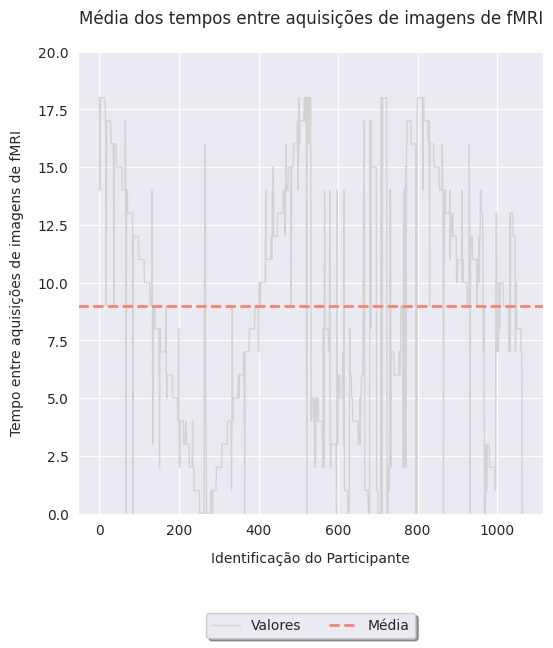

In [29]:
media_tempo = df['timepoint'].mean()

plt.figure(figsize=(6, 6))
plt.ylim(0, 20)
plt.plot(df['timepoint'], color='lightgrey', label='Valores', linewidth=1)
plt.axhline(y=media_tempo, color='salmon', linestyle='--', label='Média', linewidth=2)
plt.xlabel('Identificação do Participante\n', labelpad=10)
plt.ylabel('Tempo entre aquisições de imagens de fMRI', labelpad=10)
plt.title('Média dos tempos entre aquisições de imagens de fMRI', pad=20)

sns.set_style("darkgrid")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)
plt.show()

In [20]:
media_tempo = df['timepoint'].mean()
print("A média de tempo entre as aquisições de imagens de fMRI é:", media_tempo)

A média de tempo entre as aquisições de imagens de fMRI é: 9.0


*`df['timepoint'].mean()` calcula a média da coluna timepoint do DataFrame `df`, que representa o tempo entre as aquisições de imagens de fMRI*.   

Podemos concluir que a média de tempo entre as aquisições de imagens de fMRI é de aproximadamente 9 unidades de medida, onde a unidade específica depende do contexto do tempo utilizado no conjunto de dados.

## 4.3 Qual é a distribuição temporal da resposta cerebral em relação aos diferentes tipos de estímulos visuais apresentados durante o estudo?

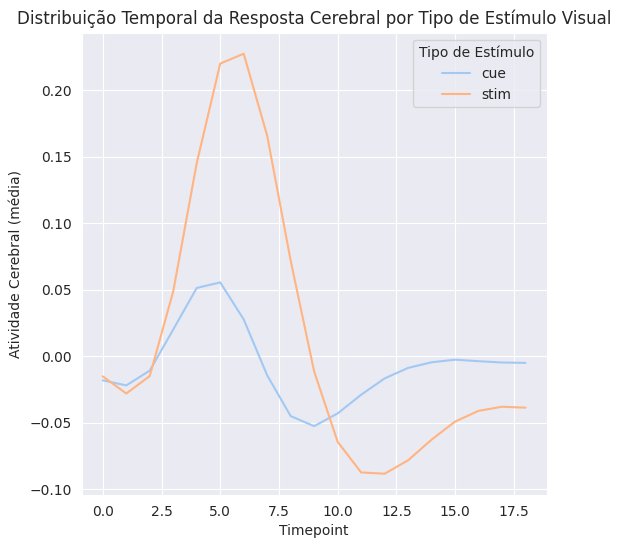

In [28]:
media_por_evento = df.groupby(['timepoint', 'event'])['signal'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.lineplot(data=media_por_evento, x='timepoint', y='signal', hue='event', ci=None, palette='pastel')
plt.title('Distribuição Temporal da Resposta Cerebral por Tipo de Estímulo Visual')
plt.xlabel('Timepoint')
plt.ylabel('Atividade Cerebral (média)')
plt.legend(title='Tipo de Estímulo')
plt.grid(True)
plt.show()

`#media_por_evento = df.groupby(['timepoint', 'event'])['signal'].mean().reset_index()` É para calcular a média da atividade cerebral para cada tipo de estímulo visual em cada timepoint

Este código carrega o conjunto de dados fMRI do seaborn, em seguida, cria um gráfico de linha para visualizar a distribuição temporal da resposta cerebral em relação aos diferentes tipos de estímulos visuais. Cada linha no gráfico representa um tipo de estímulo visual e mostra como a atividade cerebral varia ao longo do tempo.

O tipo de estímulo visual 'stim' demonstra um pico considerável na atividade cerebral, atingindo 0.20, entre os timepoints de 2.5 a 10. Isso sugere uma resposta cerebral mais intensa a esse estímulo visual durante esse período.

## 4.4 Em qual região do cérebro é observada a maior atividade medida pelo sinal de fMRI?

In [22]:
fmri_data = sns.load_dataset("fmri")
media_por_regiao = fmri_data.groupby('region')['signal'].mean()

tabela_frequencia = pd.DataFrame(media_por_regiao)
tabela_frequencia.columns = ['Média do Sinal de fMRI']

tabela_frequencia = tabela_frequencia.sort_values(by='Média do Sinal de fMRI', ascending=False)
print(tabela_frequencia)

          Média do Sinal de fMRI
region                          
parietal                0.005781
frontal                 0.001298


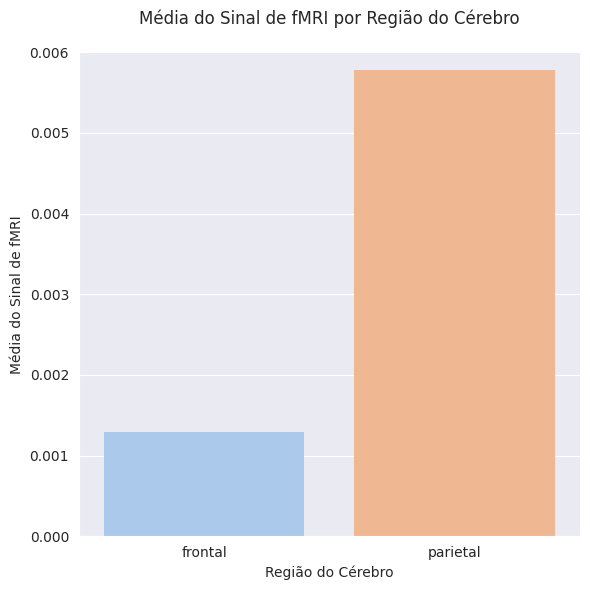

In [23]:
plt.figure(figsize=(6, 6))
sns.barplot(x=media_por_regiao.index, y=media_por_regiao.values, palette='pastel', linewidth=0, edgecolor='w')
plt.ylabel('Média do Sinal de fMRI')
plt.title('Média do Sinal de fMRI por Região do Cérebro', pad=20)
plt.xticks(rotation=0)
plt.xlabel('Região do Cérebro')
plt.ylim(0, 0.006)
plt.tight_layout()
plt.show()

Observamos que a região do cérebro com a maior atividade medida pelo sinal de fMRI é a região parietal, com uma média de sinal de fMRI de aproximadamente 0.005781. Em comparação, a região frontal apresenta uma atividade medida pelo sinal de fMRI menor, com uma média de aproximadamente 0.001298.

Esses resultados sugerem que a região parietal pode ser mais ativamente envolvida ou sensível aos estímulos ou tarefas específicas realizadas durante o estudo fMRI em comparação com a região frontal.

## 4.5 Existe uma relação entre a intensidade do sinal de fMRI e o tipo de evento do estímulo visual apresentado?   

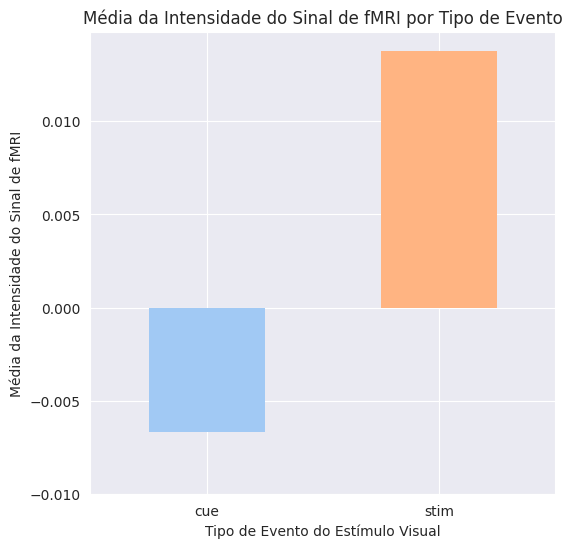

In [27]:
palette = sns.color_palette("pastel")
media_por_evento = df.groupby('event')['signal'].mean()

plt.figure(figsize=(6, 6))
media_por_evento.plot(kind='bar', color=palette, edgecolor='none')
plt.xticks(rotation=0) 
plt.ylim(-0.01, None)

plt.title('Média da Intensidade do Sinal de fMRI por Tipo de Evento')
plt.xlabel('Tipo de Evento do Estímulo Visual')
plt.ylabel('Média da Intensidade do Sinal de fMRI')
plt.show()

In [25]:
media_cue = df[df['event'] == 'cue']['signal'].mean()
media_stim = df[df['event'] == 'stim']['signal'].mean()

print("Média da intensidade do sinal de fMRI para o evento 'cue':", media_cue)
print("Média da intensidade do sinal de fMRI para o evento 'stim':", media_stim)

Média da intensidade do sinal de fMRI para o evento 'cue': -0.00666887425343856
Média da intensidade do sinal de fMRI para o evento 'stim': 0.013748411381632498


O teste de análise de variância (ANOVA) abaixo é para verificar se há diferenças significativas na intensidade do sinal de fMRI entre os diferentes tipos de eventos.

In [26]:
grupos_evento = df.groupby('event')
intensidades_por_evento = []

for evento, dados_evento in grupos_evento:
    intensidades_por_evento.append(dados_evento['signal'])

resultado_anova = f_oneway(*intensidades_por_evento)

print("Resultado do teste ANOVA:")
print("Valor-p:", resultado_anova.pvalue)

if resultado_anova.pvalue < 0.05:
    print("Há evidências de que há diferença significativa entre as intensidades do sinal de fMRI para diferentes tipos de eventos.")
else:
    print("Não há evidências suficientes para concluir que há diferença significativa entre as intensidades do sinal de fMRI para diferentes tipos de eventos.")

Resultado do teste ANOVA:
Valor-p: 0.0003805781811074681
Há evidências de que há diferença significativa entre as intensidades do sinal de fMRI para diferentes tipos de eventos.


Com base no teste ANOVA realizado, encontramos evidências significativas de que há uma diferença na intensidade do sinal de fMRI entre os diferentes tipos de eventos de estímulo visual (valor-p = 0.0003805781811074681). Isso sugere que o tipo de evento do estímulo visual apresentado tem um impacto significativo na intensidade da atividade cerebral medida pelo sinal de fMRI. Portanto, há uma relação entre a intensidade do sinal de fMRI e o tipo de evento do estímulo visual apresentado.

## 5. Insights

5.1. **Ausência de Dados Faltantes:**
   - A inexistência de dados faltantes indica uma qualidade completa e confiável dos dados, o que aumenta a confiança nas análises realizadas.

5.2. **Média de Tempo entre as Aquisições:**
   - A média de tempo entre as aquisições fornece uma medida central da frequência das imagens de FMRI adquiridas durante o estudo, permitindo entender a cadência das aquisições em relação a outros eventos ou condições.

5.3. **Distribuição Temporal da Resposta Cerebral:**
   - Analisar a distribuição temporal da resposta cerebral em relação aos diferentes tipos de estímulos visuais revela padrões ou tendências na atividade cerebral em resposta a diferentes estímulos, auxiliando na identificação de períodos de maior ou menor atividade cerebral ao longo do tempo.

5.4. **Região do Cérebro com Maior Atividade:**
   - A região parietal do cérebro apresenta a maior atividade medida pelo sinal de FMRI, enquanto a região frontal exibe uma atividade menor. Isso sugere um possível envolvimento mais ativo ou sensibilidade da região parietal em relação aos estímulos ou tarefas específicas realizadas durante o estudo de FMRI.

5.5. **Teste ANOVA:**
   - O teste ANOVA indica diferenças significativas na intensidade do sinal de FMRI entre os diferentes tipos de eventos de estímulo visual, fornecendo evidências de uma relação entre a intensidade do sinal de FMRI e o tipo de evento do estímulo visual apresentado.

5.6. **Média da Intensidade do Sinal de FMRI:**
   - A média da intensidade do sinal de FMRI é de -0.0067 para o evento 'cue' e 0.0137 para o evento 'stim'. Isso sugere que o evento 'stim' tende a ter uma intensidade de sinal de FMRI mais alta em comparação com o evento 'cue', embora as diferenças sejam relativamente pequenas.


## 6. Observações

- **Integridade dos Dados:**
  - A ausência de dados faltantes é fundamental, pois indica que a base de dados está completa e pronta para ser analisada. Isso aumenta a confiança na qualidade dos resultados obtidos durante a análise.

- **Atividade Cerebral por Região:**
  - A análise das regiões cerebrais revelou variações na atividade cerebral, com a região parietal demonstrando maior atividade em comparação com a região frontal. Essa descoberta é importante para compreender como diferentes áreas do cérebro respondem a estímulos específicos.

- **Resposta ao Estímulo Visual:**
  - A variação na intensidade do sinal de FMRI entre os diferentes tipos de eventos de estímulo visual indica que o tipo de estímulo apresentado tem um impacto significativo na atividade cerebral medida. Isso sugere que diferentes estímulos visuais podem desencadear respostas cerebrais distintas, o que é crucial para entender como o cérebro processa e responde a estímulos visuais.

- **Limitações na Interpretação dos Resultados:**
  - É importante reconhecer as limitações na interpretação dos resultados. Embora as análises forneçam insights valiosos, é necessário cautela ao tirar conclusões definitivas. Consultar especialistas, como neurocientistas ou pesquisadores em FMRI, pode fornecer uma interpretação mais precisa e detalhada dos dados.